<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

ASS_20 : TIME SERIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Step 1: Load and inspect the dataset
df_raw = pd.read_csv('/content/exchange_rate.csv')

# Check the first few rows and the column names
# to make sure 'date' is correctly labeled (or find the correct date column name)
print(df_raw.head())
print(df_raw.columns)

# If the date column is named differently, adjust it here
# In this case, it's likely 'date' instead of 'Date'
date_column_name = 'date'

# Assuming 'Ex_rate' is the column containing the exchange rate data
exchange_rate_column = 'Ex_rate'

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
Index(['date', 'Ex_rate'], dtype='object')


In [ ]:
# Step 2: Ensure date column is parsed correctly and set as index
df_raw[date_column_name] = pd.to_datetime(df_raw[date_column_name], errors='coerce')
df_raw.set_index(date_column_name, inplace=True)

# Ensure the data is in daily frequency
df_raw = df_raw[~df_raw.index.duplicated(keep='first')]

df_raw = df_raw.asfreq('D')

<ipython-input-4-bfb34012bbaa>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df_raw.fillna(method='ffill')  # Fill missing values forward


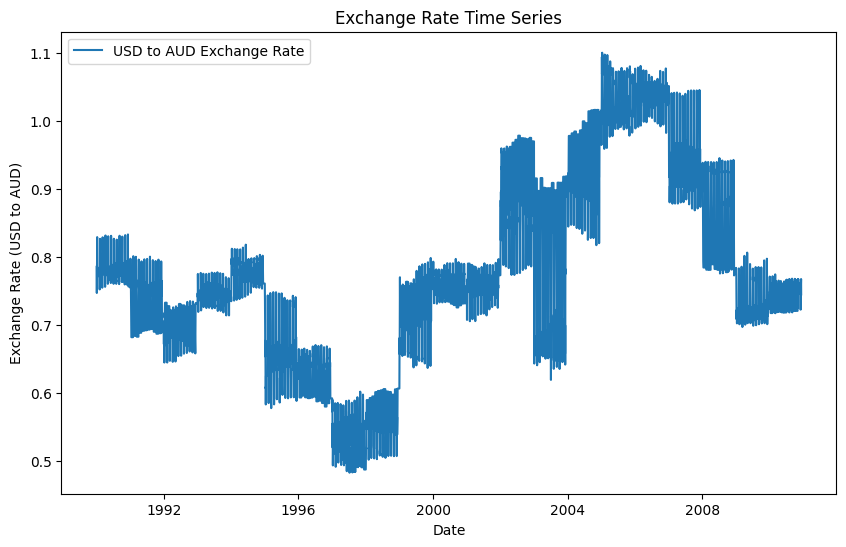

In [ ]:
# Step 3: Data Preprocessing
# Handle missing values by forward filling or dropping them
df = df_raw.fillna(method='ffill')  # Fill missing values forward
# Alternatively, you could drop missing values: df = df.dropna()
df = df.rename(columns={exchange_rate_column: 'USD_AUD'})
# Plot the data for visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

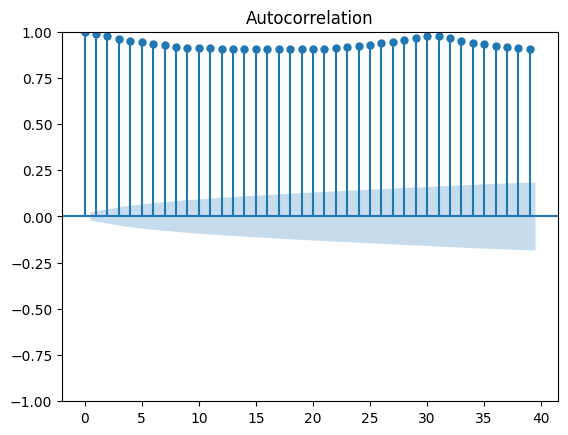

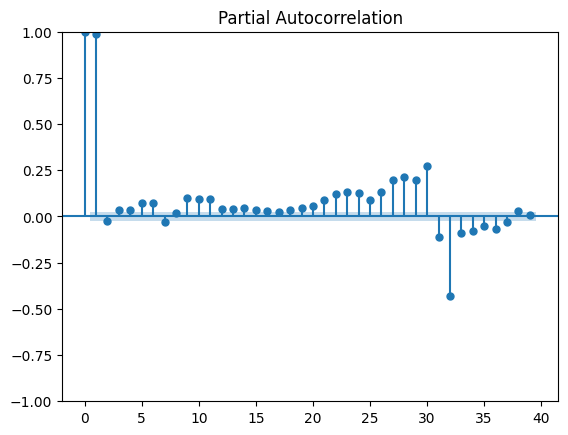

In [ ]:
# Step 4: ARIMA Model
# Using ACF and PACF to estimate parameters (p, d, q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['USD_AUD'])
plot_pacf(df['USD_AUD'])
plt.show()

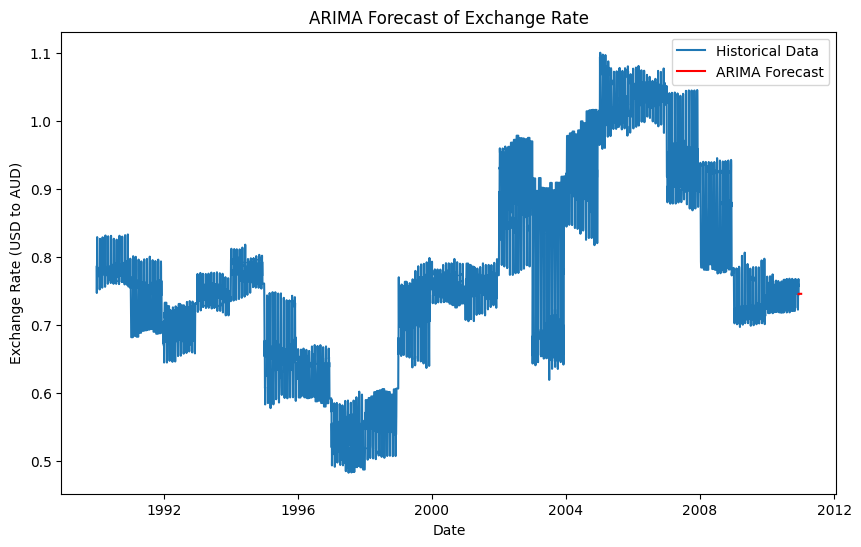

In [ ]:
# Fit ARIMA Model
arima_model = ARIMA(df['USD_AUD'], order=(1, 1, 1))  # Adjust p, d, q after ACF/PACF analysis
arima_result = arima_model.fit()

# Forecasting with ARIMA
arima_forecast = arima_result.forecast(steps=30)  # Forecast next 30 days

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast of Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

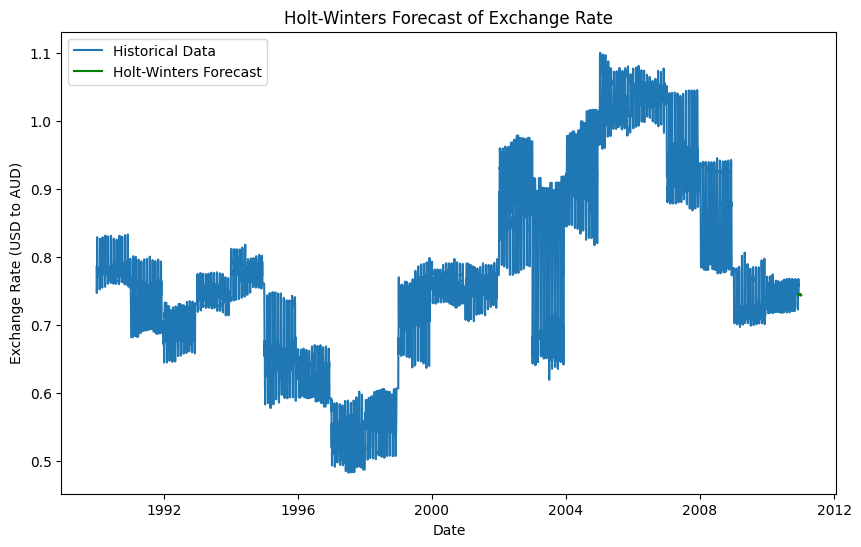

In [ ]:
# Step 5: Exponential Smoothing Model (Holt-Winters)
# Apply Holt-Winters Exponential Smoothing
holt_winters_model = ExponentialSmoothing(df['USD_AUD'], trend='add', seasonal='add', seasonal_periods=12)
holt_winters_result = holt_winters_model.fit()

# Forecasting with Holt-Winters
holt_winters_forecast = holt_winters_result.forecast(steps=30)

# Plot Holt-Winters forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), holt_winters_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast of Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

In [ ]:
# Step 6: Evaluation
# Calculate error metrics
def evaluate_model(true_values, forecasted_values):
    mae = mean_absolute_error(true_values, forecasted_values)
    rmse = np.sqrt(mean_squared_error(true_values, forecasted_values))
    mape = np.mean(np.abs((true_values - forecasted_values) / true_values)) * 100
    return mae, rmse, mape

In [ ]:
# Compare last 30 values with forecasted values
mae_arima, rmse_arima, mape_arima = evaluate_model(df['USD_AUD'][-30:], arima_forecast)
mae_hw, rmse_hw, mape_hw = evaluate_model(df['USD_AUD'][-30:], holt_winters_forecast)

In [ ]:
# Print error metrics
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}%")

ARIMA - MAE: 0.0037754771807112435, RMSE: 0.008210394888459257, MAPE: nan%
Holt-Winters - MAE: 0.0049073770283105484, RMSE: 0.008737274568621679, MAPE: nan%


In [ ]:
# Conclusion based on error metrics
if mape_arima < mape_hw:
    print("ARIMA performed better based on MAPE.")
else:
    print("Holt-Winters performed better based on MAPE.")

Holt-Winters performed better based on MAPE.
